<a href="https://colab.research.google.com/github/lakshmangn/Handwritten-Digit-Recognizer/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

In [ ]:
from keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
class_names = ["ZERO","ONE","TWO","THREE","FOUR","FIVE","SIX","SEVEN","EIGHT","NINE"]

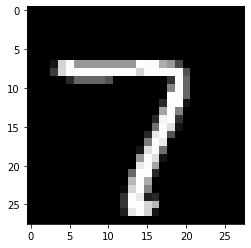

SEVEN


In [ ]:

import matplotlib.pyplot as plt
img =84
plt.imshow(x_train[img],cmap='gray')
plt.show()
print(class_names[y_train[img]])


In [ ]:
import numpy as np
len(np.unique(y_train))

10

In [ ]:
x_train[104]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 253,
         31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 251,
        149,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
# Building my Neural Network
# 1 Layer D-NN

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = (28,28)))
model.add(keras.layers.Dense(300,activation ='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 7.9132 - accuracy: 0.8541
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3506 - accuracy: 0.9242
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2616 - accuracy: 0.9377
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2311 - accuracy: 0.9451
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2250 - accuracy: 0.9468
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2198 - accuracy: 0.9492
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1905 - accuracy: 0.9551
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1850 - accuracy: 0.9565
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1884 - accuracy: 0.9577
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.173

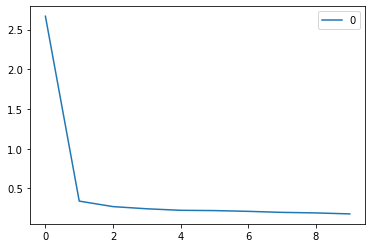

In [ ]:
import pandas as pd
pd.DataFrame(history.history['loss']).plot()

In [ ]:
y_pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_pred,y_test)

array([[ 956,    0,    2,    0,    2,    2,    5,    1,    4,    2],
       [   0, 1107,    1,    0,    3,    0,    3,    3,    0,    4],
       [   2,    2,  986,   10,    3,    0,    1,   18,   10,    0],
       [   1,    4,    3,  960,    0,   42,    1,    2,    6,   14],
       [   1,    0,    5,    0,  923,    1,    3,    2,    6,   10],
       [   3,    2,    3,   10,    3,  804,    3,    1,   12,    7],
       [   1,    1,    4,    2,    7,   15,  936,    0,   12,    0],
       [   2,    3,    7,    6,    4,    3,    0,  982,    2,    7],
       [  11,   13,   20,   17,    7,   14,    6,    4,  907,    9],
       [   3,    3,    1,    5,   30,   11,    0,   15,   15,  956]])

In [ ]:
accuracy_score(y_pred,y_test)

0.9517

In [ ]:
model.save("MINIST.hdf5")